# Smoothened diffusivity at boundary

In [1]:
# Liberary
import numpy as np
from scipy.interpolate import CubicSpline
import datetime
import threading
import multiprocessing as mp
from matplotlib import pyplot as plt
from time import time
from scipy.stats import norm
%matplotlib inline
plt.style.use('bmh')

In [2]:
# Sympy function
import sympy
#sympy.init_printing()
z = sympy.symbols('z')

K0 = 1e-6
K1 = 6e-3  # m / s
Aalpha = 0.5
c = 10
w = 0

sym_Diffusion = K0 + K1 * z * sympy.exp(-Aalpha * z)
sym_dKdz = sympy.diff(sym_Diffusion, z, 1)

Diffusion = sympy.utilities.lambdify(z, sym_Diffusion, np)
dKdz = sympy.utilities.lambdify(z, sym_dKdz, np)

sym_Diffusion_S = K0 + K1 * z * sympy.exp(
    -Aalpha * z) + K1 / c * (1 - sympy.tanh(c * (z)))
sym_dKdz_S = sympy.diff(sym_Diffusion_S, z, 1)

Diffusion_S = sympy.utilities.lambdify(z, sym_Diffusion_S, np)
dKdz_S = sympy.utilities.lambdify(z, sym_dKdz_S, np)

In [3]:
z =np.linspace(0, 10, 1000)

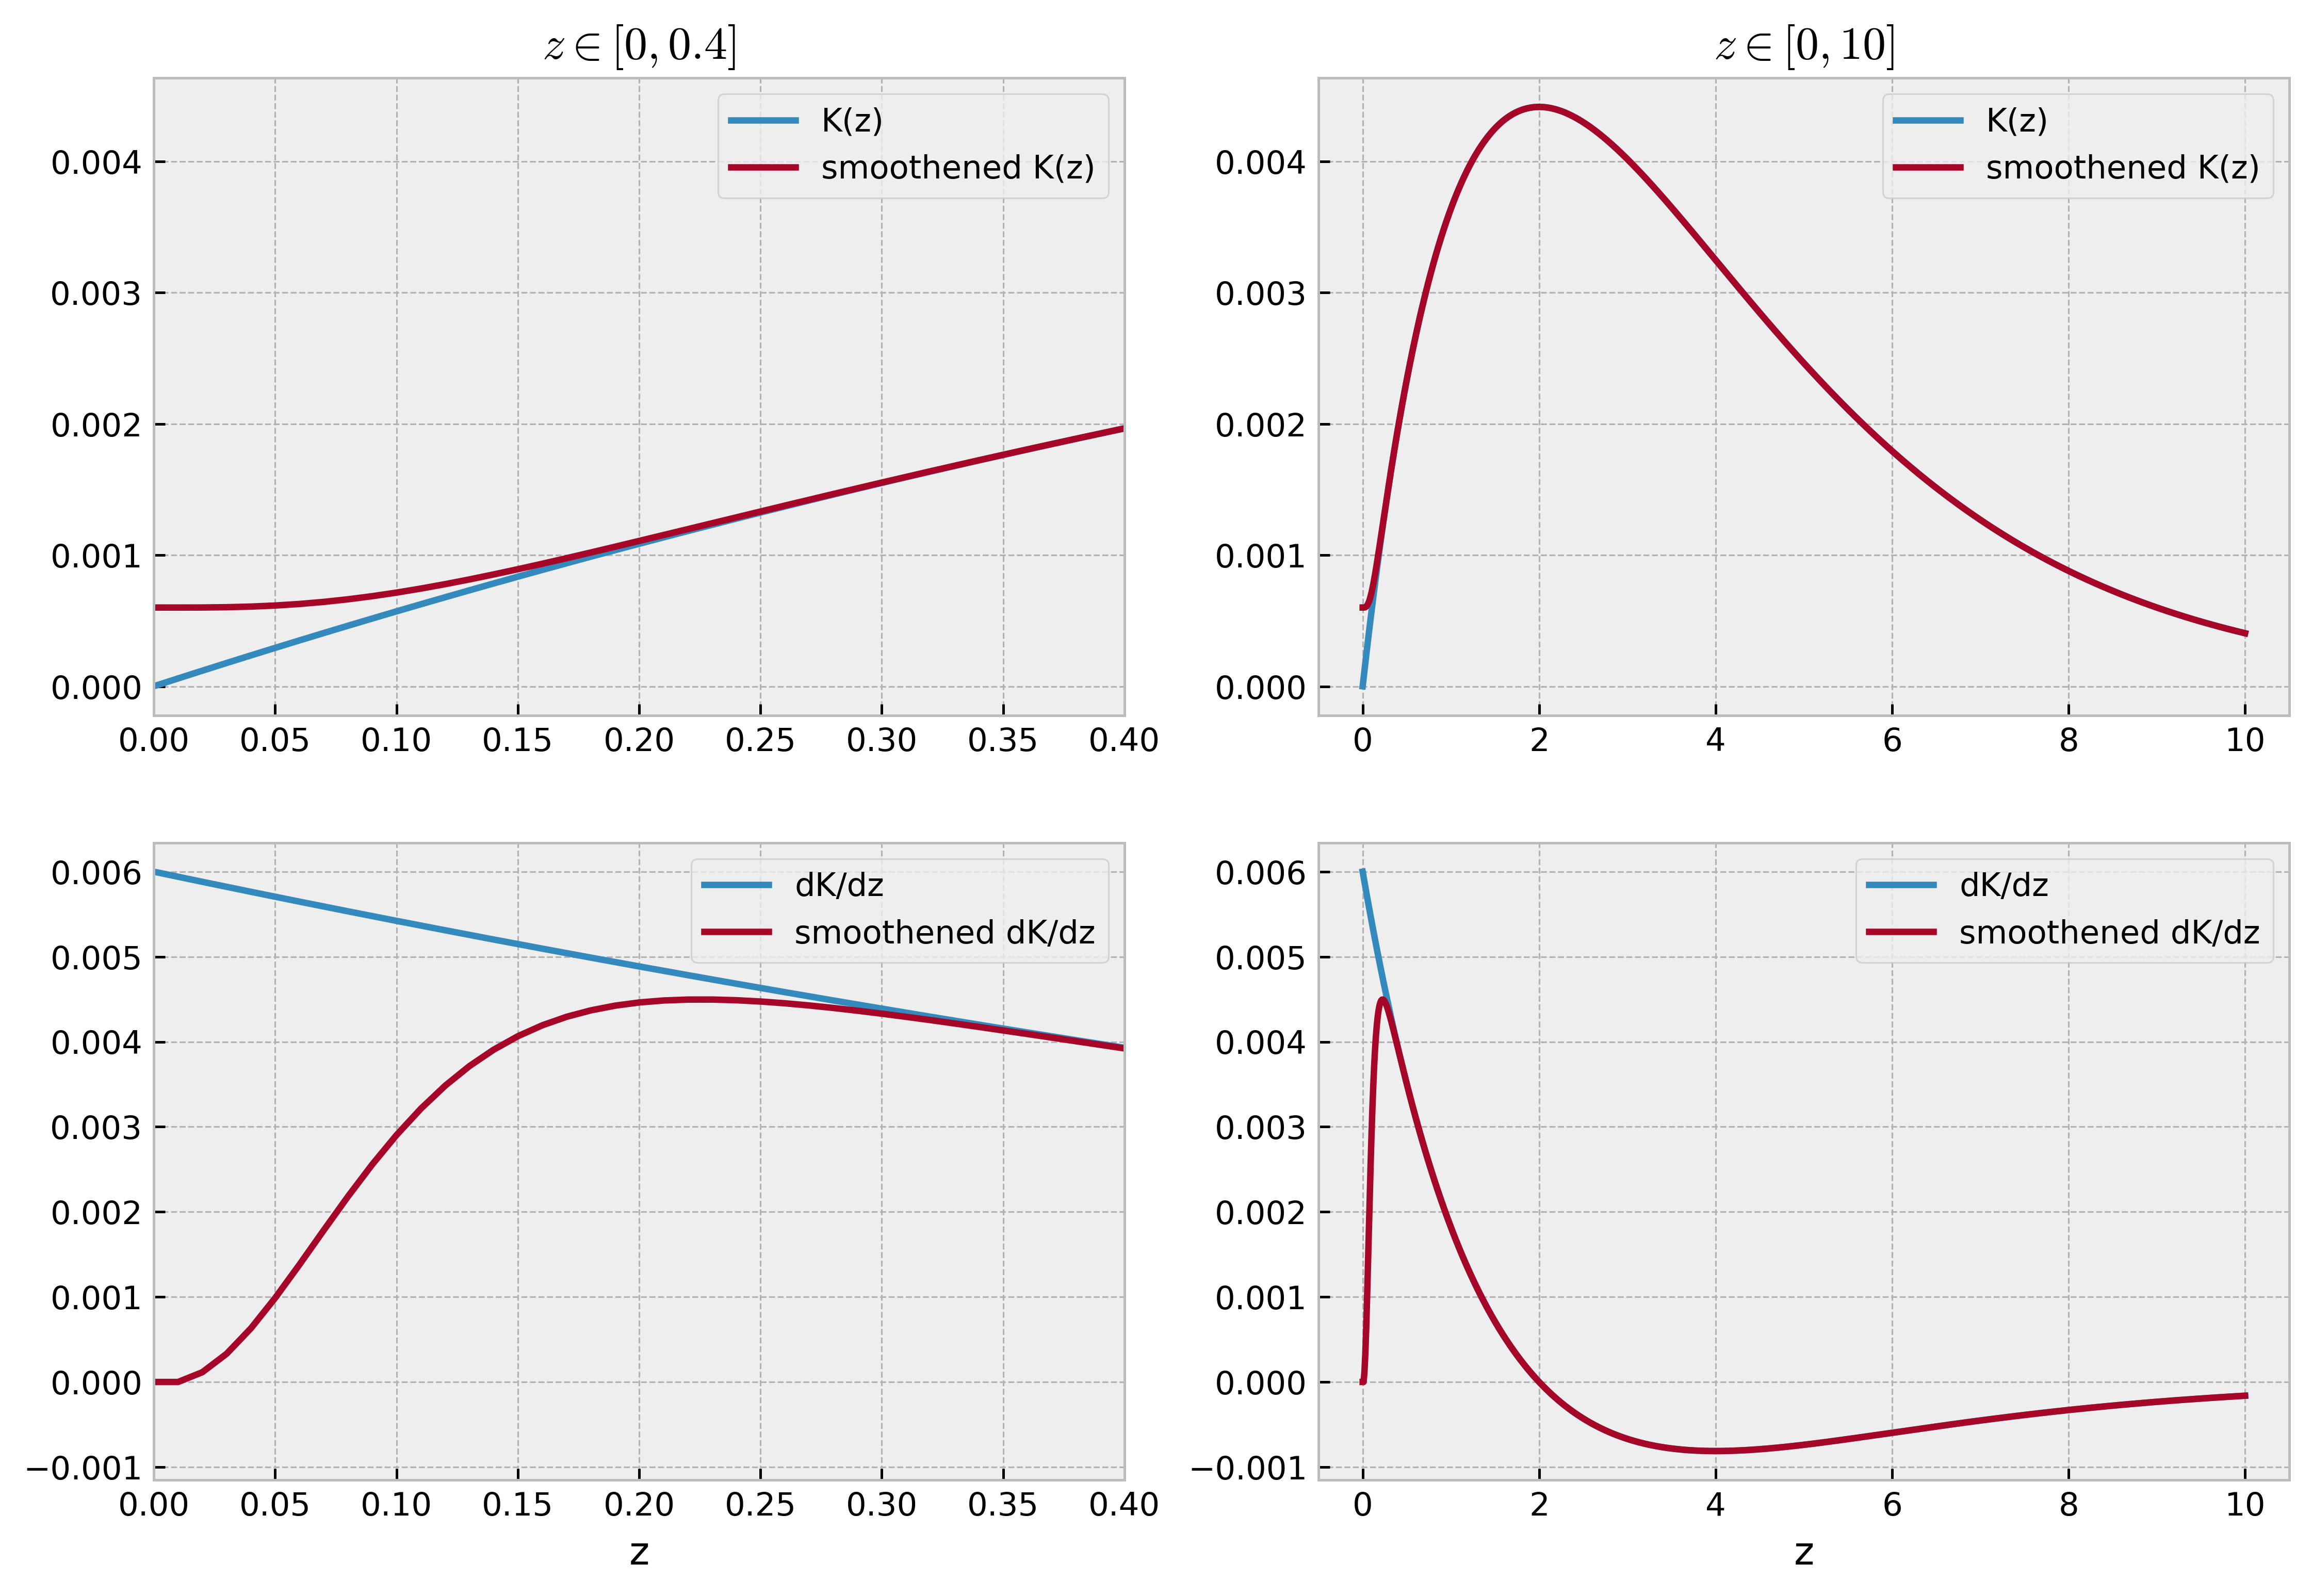

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11.87,8), dpi = 450)
ax[0,0].plot(z, Diffusion(z), label = "K(z)")
ax[0,0].plot(z, Diffusion_S(z), label = "smoothened K(z)")
ax[0,0].set_xlim(0,0.4)
ax[0,0].legend()
ax[0,0].set_title("$z \in [0, 0.4]$")

ax[1,0].plot(z, dKdz(z), label = "dK/dz")
ax[1,0].plot(z, dKdz_S(z), label = "smoothened dK/dz")
ax[1,0].set_xlim(0,0.4)
ax[1,0].set_xlabel("z")
ax[1,0].legend()

ax[0,1].plot(z, Diffusion(z), label = "K(z)")
ax[0,1].plot(z, Diffusion_S(z), label = "smoothened K(z)")
ax[0,1].set_title("$z \in [0, 10]$")
ax[0,1].get_shared_y_axes().join(ax[0,1], ax[0,0])
ax[0,1].legend()

ax[1,1].plot(z, dKdz(z), label = "dK/dz")
ax[1,1].plot(z, dKdz_S(z), label = "smoothened dK/dz")
ax[1,1].set_xlabel("z")
ax[1,1].legend()